# Bank Marketing Dataset Anaysis

#### Author: Geovanny Tabango


# CRIPS - DM Methodology
 1. Bussiness Understanding.
 2. Data Understanding. 
 3. Data Preparation.
 4. Modelling. 
 5. Evaluation. 
 6. Deplotment.

### 1. Bussiness Understanding
 - Marketing campaing from 2008 to 2010 (2 Years Data Colleted).
 - The target value `y` describes wether the customer holds subscribe deposit in the bank or not.
 - Its expected to have the samples a larger distribution of `no` subscription compared to the `yes`.
 - The marketing team is to use the information extracted from the data set to better orginze a strategy to possitevely indentify costumers that are more likely to say `yes` to subscribe to the deposit.
 - The end objective is to better utilize the resources of the banking allowing a more room of improvements in the calls.

### 2. Data Understanding

##### 2.1 Imports needed for data analyis

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve
from imblearn.pipeline import Pipeline as ImbPipeline

#### 2.2 Load the dataset

In [2]:
# Set a ramdom seed for reproducibility
# The random seed method hold and arbitrary number
np.random.seed(98)

In [3]:
# Load the dataset in to a pandas dataframe.
# By exploring the dataset we can see that the data is a CSV file with a delimiter of semi-colon ';'.
df = pd.read_csv('../data/raw/bank-additional-full.csv', sep=';')

#### 2.3 Display the basic information of the dataset.

- By the description of the dataset there are 0 missing values. 

In [4]:
#Double checking for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
#Display the 5 firt rows of the dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
#Display the 5 last rows of the dataset
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
# Display the columns of the dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
# Display the shape of the dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# The skew method is to determine the skewness of the dataset.
# This method is only applied to the numerical type of data.
# 0 means the data is normally distributed.
# values close to 1 means the data is skewed to the right.
# values close to -1 means the data is skewed to the left.
df.skew(numeric_only=True)

age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

In [11]:
# Display the unique values of the dataset.
# Selet all the 'object' type of columns and apply the values_counts method which will display the unique values of the columns.

categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("\n")

Value counts for column 'job':
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


Value counts for column 'marital':
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


Value counts for column 'education':
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64


Value counts for column 'default':
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64


Value counts for column 'housing':
housing
yes        21576
no         18622
unknown     

In [12]:
# Display the unique values in the dataset.

for column in df.columns:
    print(f"Unique values in column '{column}':")
    print(df[column].unique())
    print("\n")

Unique values in column 'age':
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]


Unique values in column 'job':
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


Unique values in column 'marital':
['married' 'single' 'divorced' 'unknown']


Unique values in column 'education':
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


Unique values in column 'default':
['no' 'unknown' 'yes']


Unique values in column 'housing':
['no' 'yes' 'unknown']


Unique values in column 'loan':
['no' 'yes' 'unknown']


Unique values in column 'contact':
['telephone' 'cellular']


Unique values in column 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'de

### 2.5 Exploratory Data Analysis (EDA)

In [29]:
# Step 1: Examine our dataset structure
print("Dataset Shape:", df.shape)
print("\nColumns in dataset:")
print(df.columns.tolist())

Dataset Shape: (41188, 21)

Columns in dataset:
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


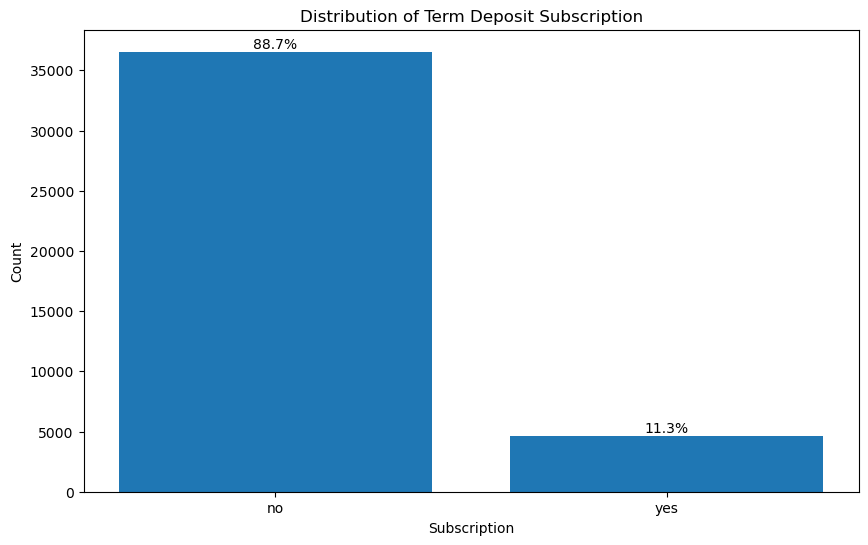


Target Variable Distribution:
y
no     88.73%
yes    11.27%
Name: proportion, dtype: object


In [30]:
# Step 2: Target Variable Analysis
def analyze_target_distribution(df):
    plt.figure(figsize=(10, 6))
    target_dist = df['y'].value_counts()
    
    # Create bar plot
    plt.bar(target_dist.index, target_dist.values)
    plt.title('Distribution of Term Deposit Subscription')
    plt.xlabel('Subscription')
    plt.ylabel('Count')
    
    # Add percentage labels
    total = len(df)
    for i, v in enumerate(target_dist.values):
        percentage = (v/total) * 100
        plt.text(i, v, f'{percentage:.1f}%', ha='center', va='bottom')
    
    plt.savefig('../reports/figures/Task_1/target_variable_distribution.png')
    plt.show()
    plt.close()
    
    # Print summary statistics
    print("\nTarget Variable Distribution:")
    print(df['y'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

analyze_target_distribution(df)


Numerical Features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


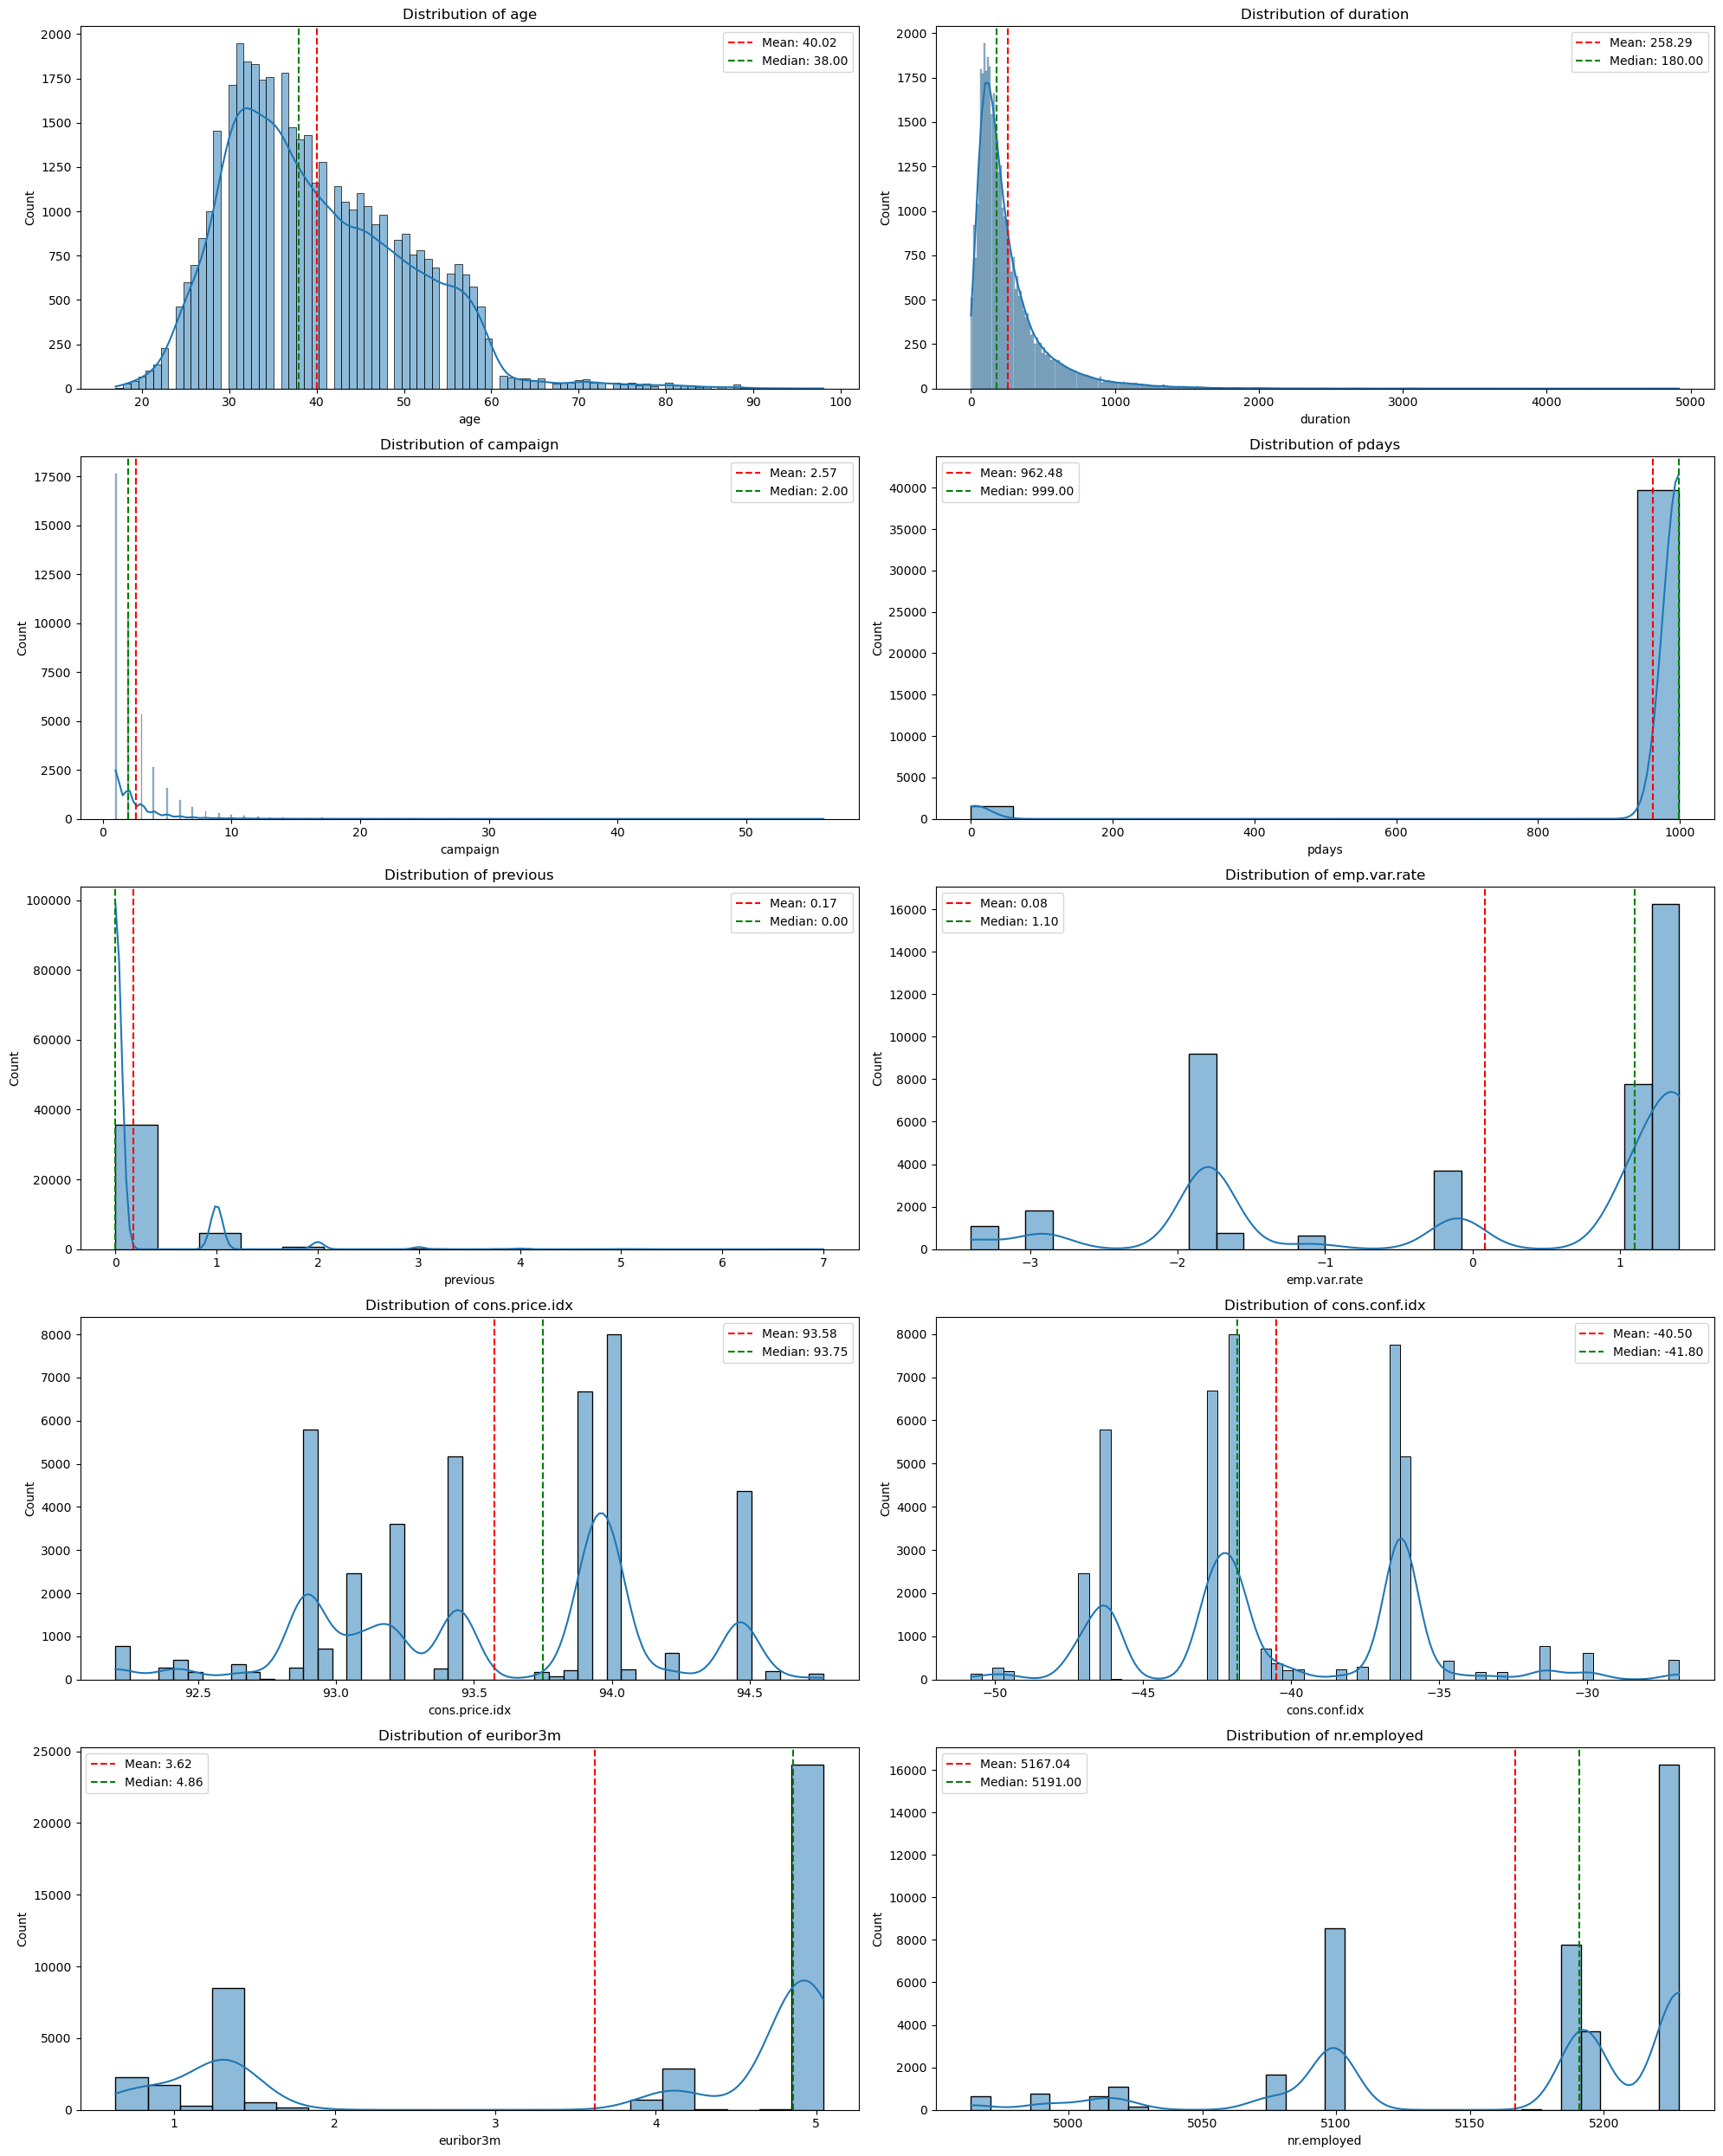


Numerical Features Summary Statistics:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.5

In [31]:
# Step 3: Numerical Features Analysis
def analyze_numerical_features(df):
    # Get numerical features
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    print("\nNumerical Features:", numerical_features.tolist())
    
    # Create distribution plots
    num_features = len(numerical_features)
    num_rows = (num_features + 1) // 2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))
    axes = axes.flatten()
    
    for i, feature in enumerate(numerical_features):
        # Plot histogram with KDE
        sns.histplot(data=df, x=feature, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature}')
        
        # Add descriptive statistics
        mean_val = df[feature].mean()
        median_val = df[feature].median()
        axes[i].axvline(mean_val, color='r', linestyle='--', 
                       label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='g', linestyle='--', 
                       label=f'Median: {median_val:.2f}')
        axes[i].legend()
    
    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.savefig('../reports/figures/Task_1/numerical_features_distribution.png')
    plt.show()
    plt.close()
    
    # Print summary statistics
    print("\nNumerical Features Summary Statistics:")
    print(df[numerical_features].describe())

analyze_numerical_features(df)


Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


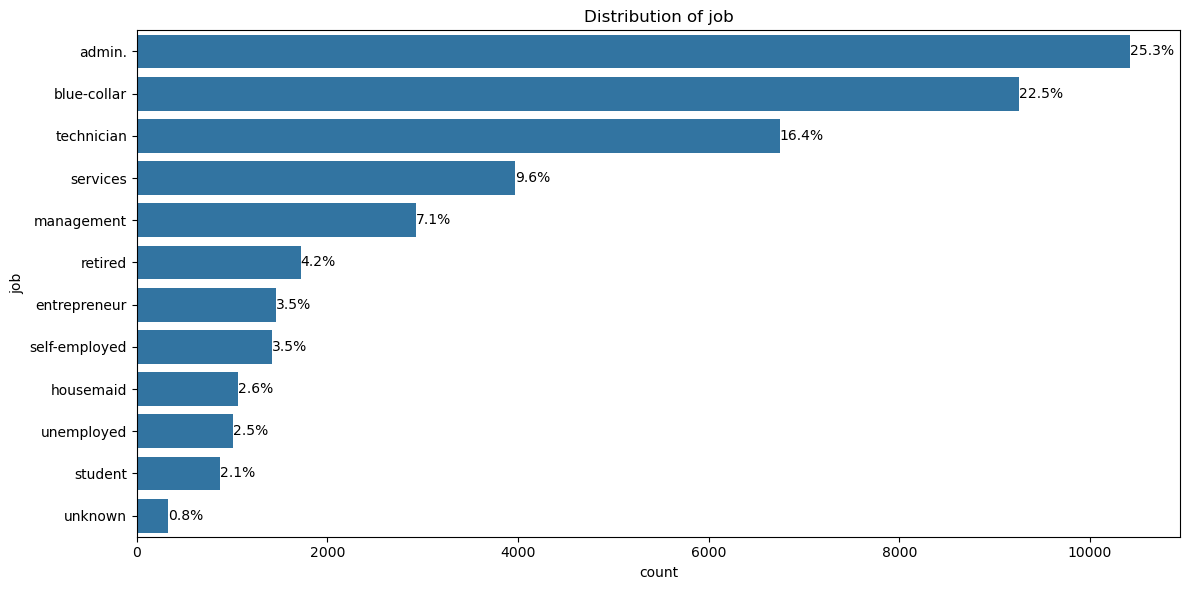


Distribution of job:
job
admin.            25.3%
blue-collar      22.47%
technician       16.37%
services          9.64%
management         7.1%
retired           4.18%
entrepreneur      3.54%
self-employed     3.45%
housemaid         2.57%
unemployed        2.46%
student           2.12%
unknown            0.8%
Name: proportion, dtype: object


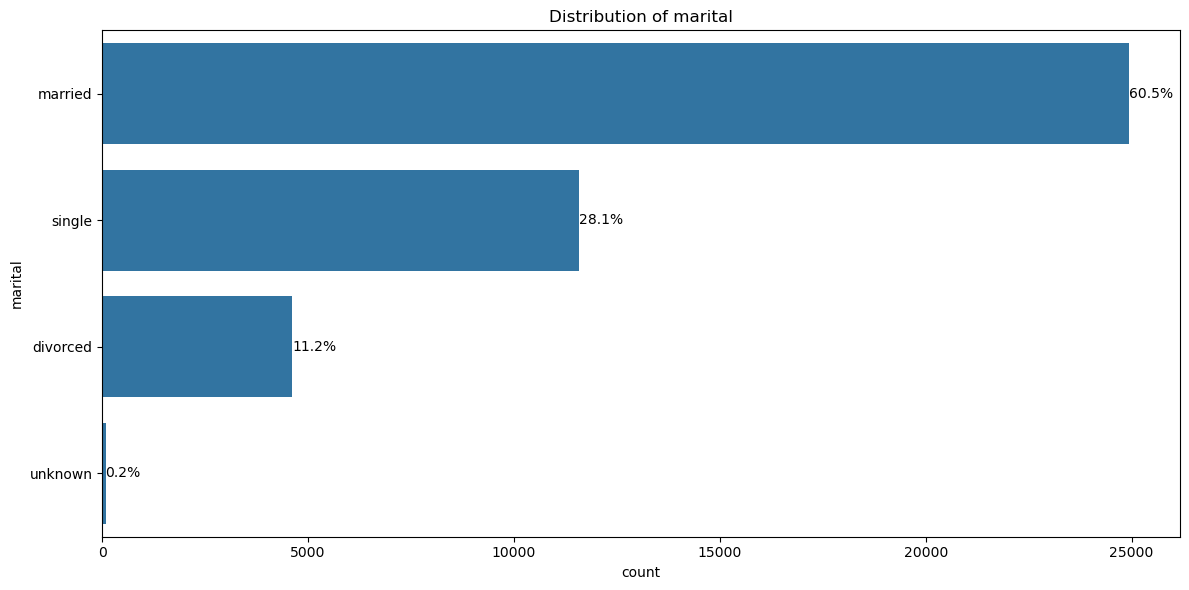


Distribution of marital:
marital
married     60.52%
single      28.09%
divorced     11.2%
unknown      0.19%
Name: proportion, dtype: object


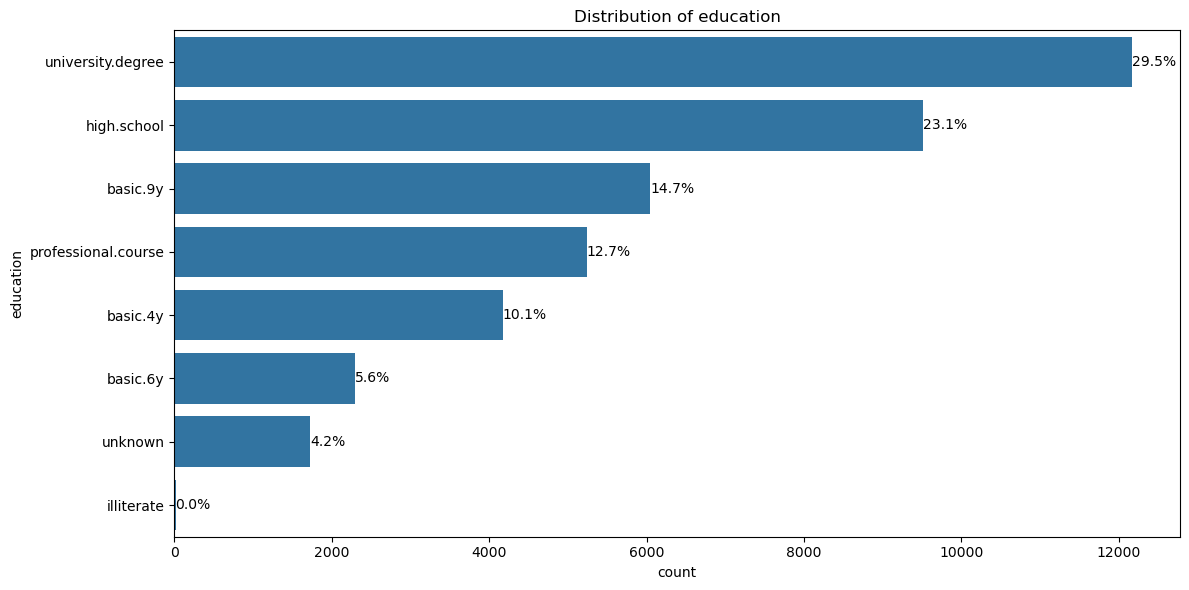


Distribution of education:
education
university.degree      29.54%
high.school             23.1%
basic.9y               14.68%
professional.course    12.73%
basic.4y               10.14%
basic.6y                5.56%
unknown                  4.2%
illiterate              0.04%
Name: proportion, dtype: object


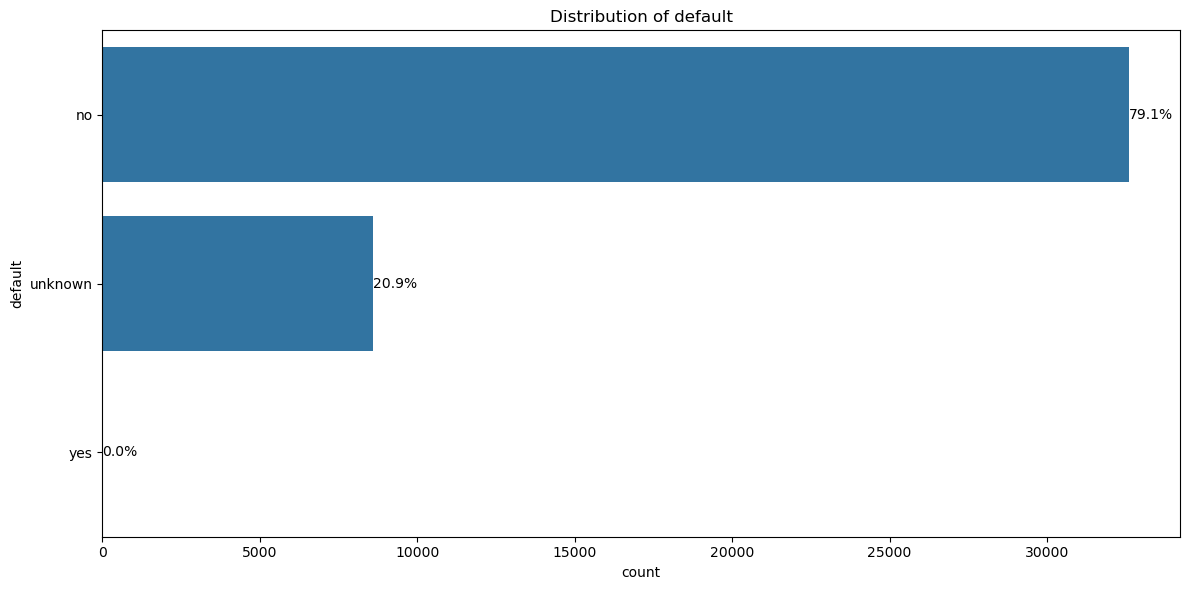


Distribution of default:
default
no         79.12%
unknown    20.87%
yes         0.01%
Name: proportion, dtype: object


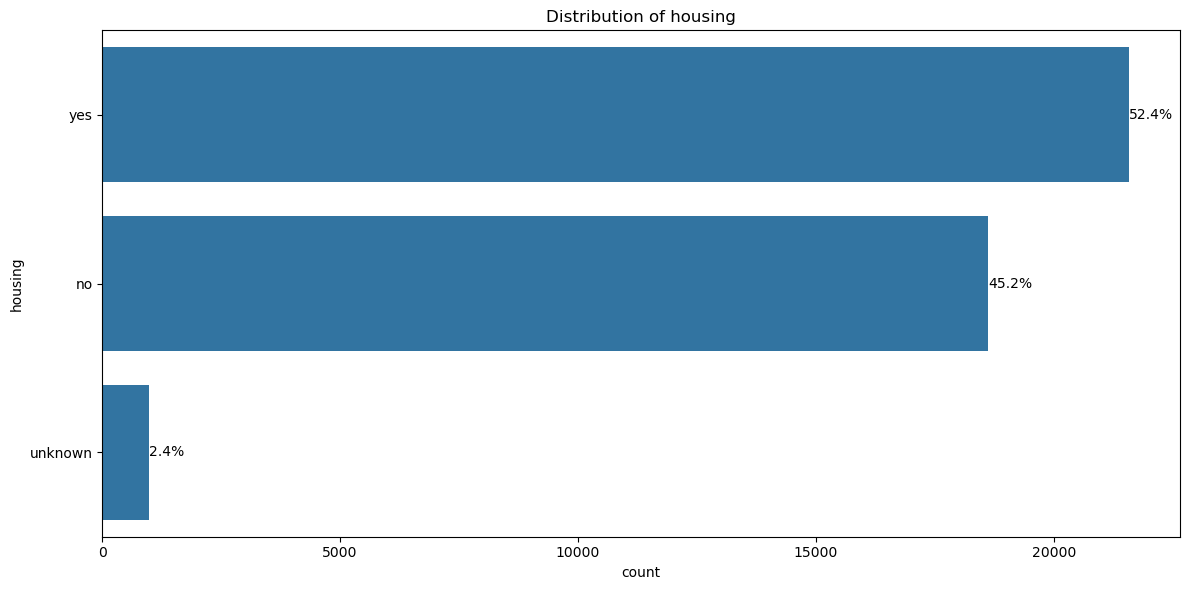


Distribution of housing:
housing
yes        52.38%
no         45.21%
unknown      2.4%
Name: proportion, dtype: object


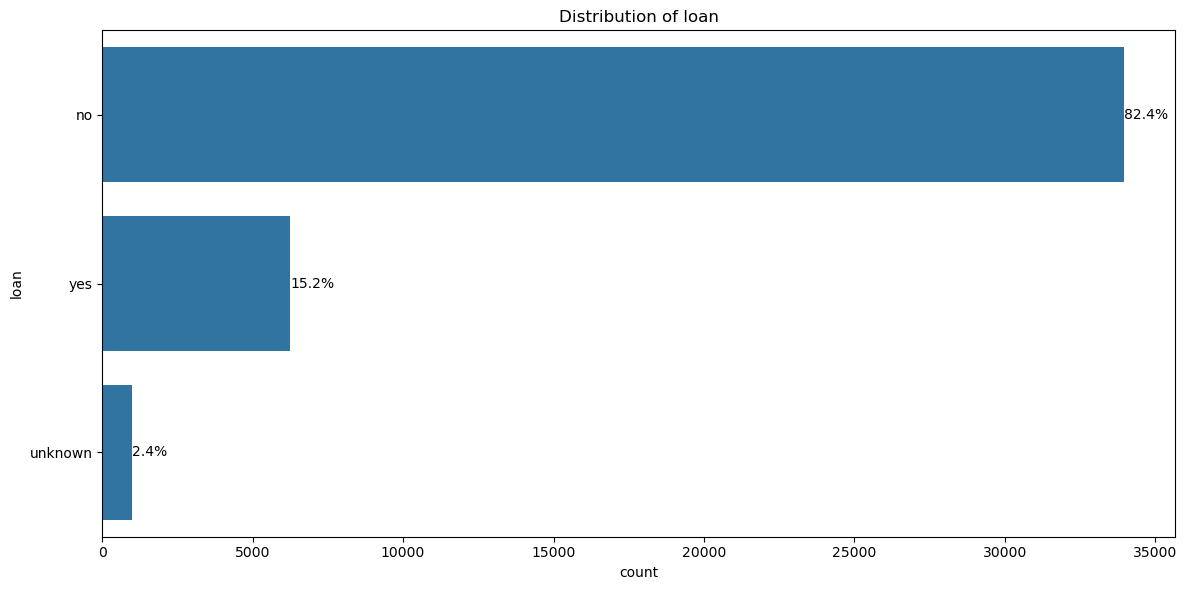


Distribution of loan:
loan
no         82.43%
yes        15.17%
unknown      2.4%
Name: proportion, dtype: object


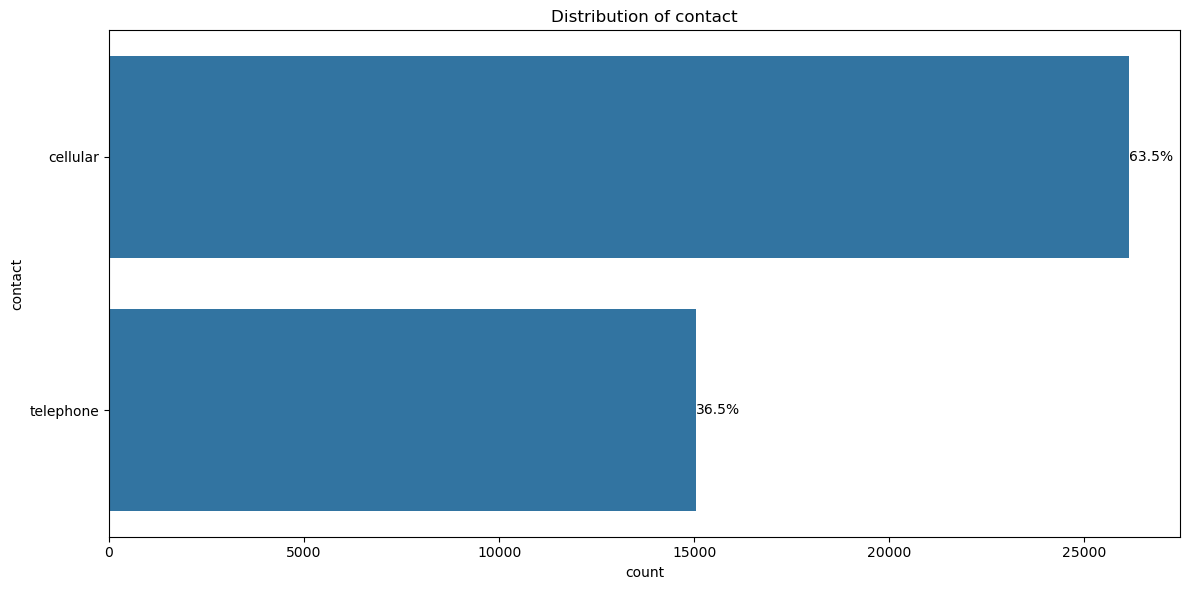


Distribution of contact:
contact
cellular     63.47%
telephone    36.53%
Name: proportion, dtype: object


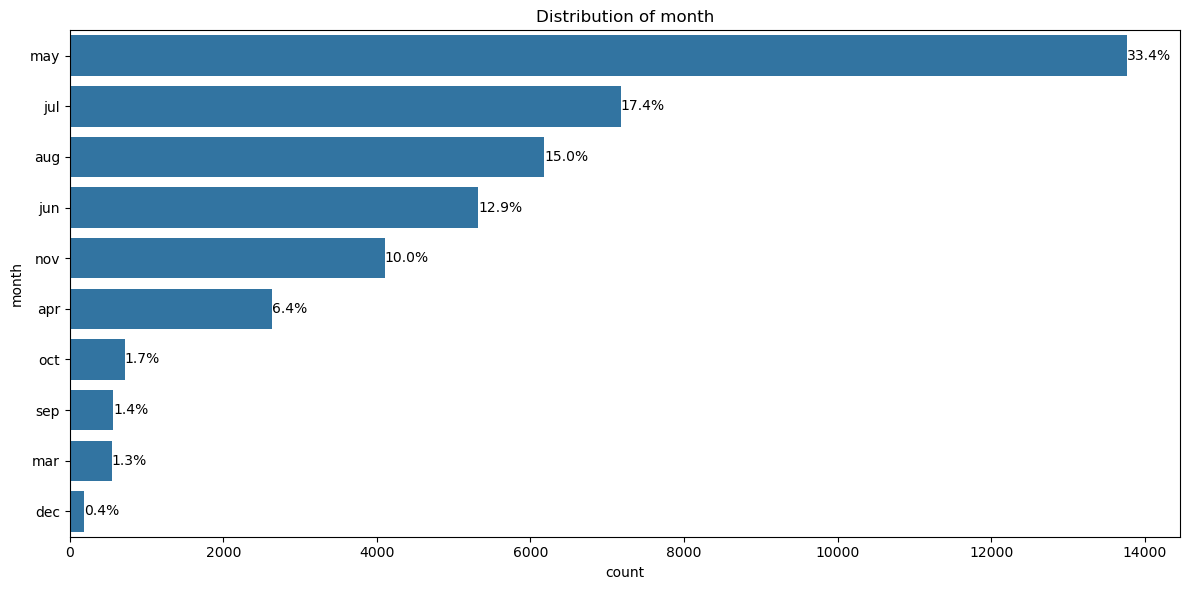


Distribution of month:
month
may    33.43%
jul    17.42%
aug     15.0%
jun    12.91%
nov     9.96%
apr     6.39%
oct     1.74%
sep     1.38%
mar     1.33%
dec     0.44%
Name: proportion, dtype: object


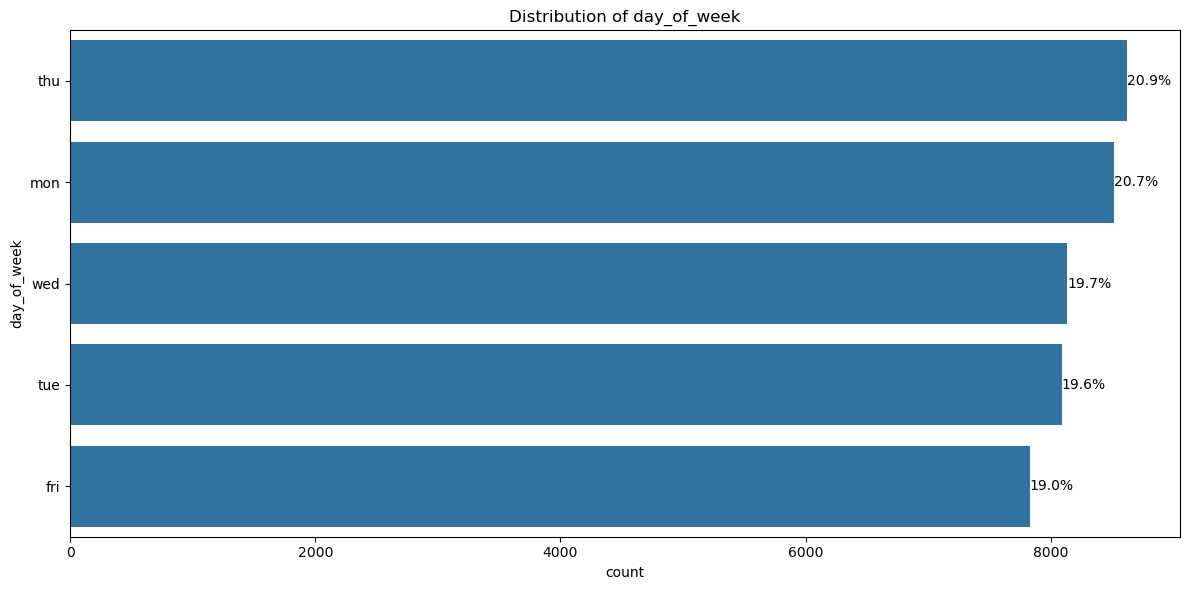


Distribution of day_of_week:
day_of_week
thu    20.94%
mon    20.67%
wed    19.75%
tue    19.64%
fri     19.0%
Name: proportion, dtype: object


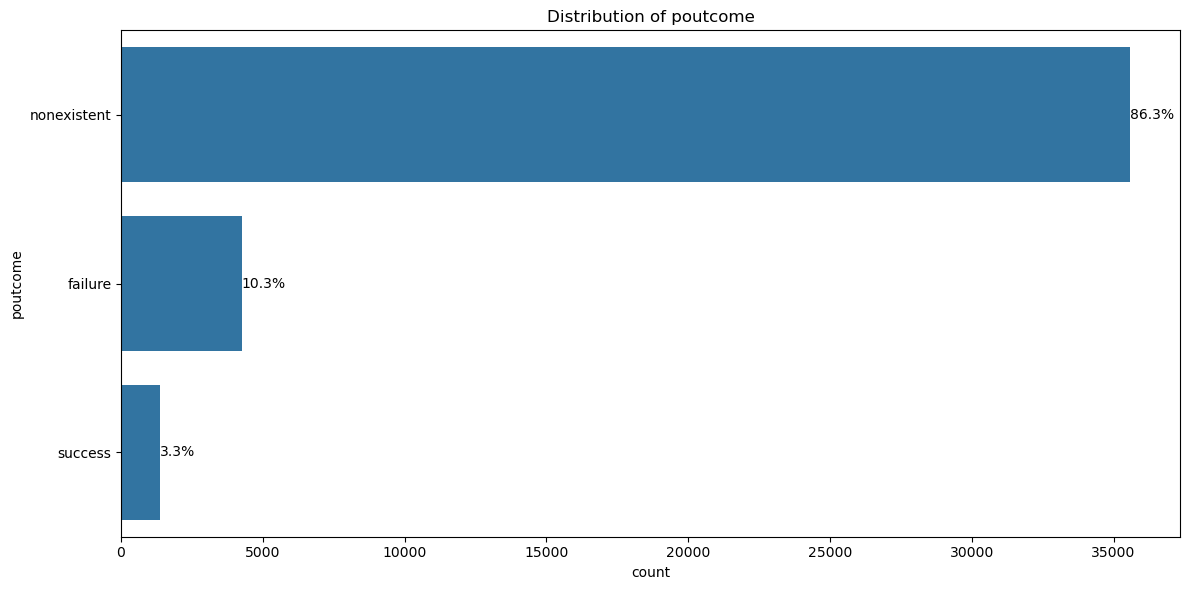


Distribution of poutcome:
poutcome
nonexistent    86.34%
failure        10.32%
success         3.33%
Name: proportion, dtype: object


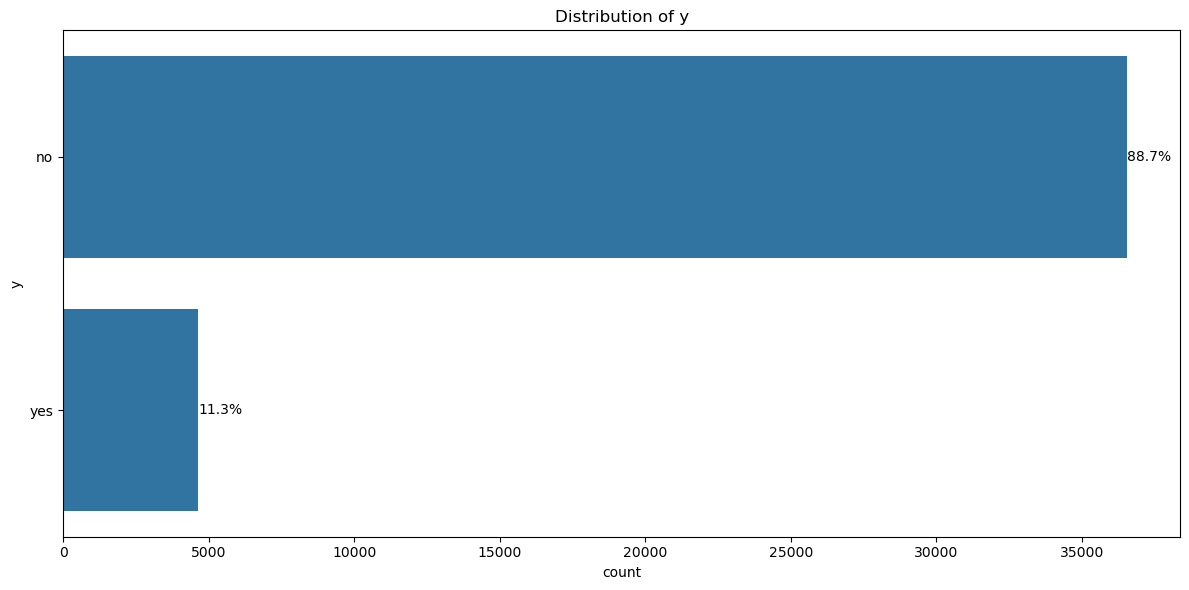


Distribution of y:
y
no     88.73%
yes    11.27%
Name: proportion, dtype: object


In [32]:
# Step 4: Categorical Features Analysis
def analyze_categorical_features(df):
    # Get categorical features
    categorical_features = df.select_dtypes(include=['object']).columns
    print("\nCategorical Features:", categorical_features.tolist())
    
    # Create distribution plots
    for feature in categorical_features:
        plt.figure(figsize=(12, 6))
        
        # Create count plot
        sns.countplot(y=df[feature], order=df[feature].value_counts().index)
        plt.title(f'Distribution of {feature}')
        
        # Add percentage labels
        total = len(df)
        for p in plt.gca().patches:
            percentage = 100 * p.get_width()/total
            plt.gca().annotate(f'{percentage:.1f}%', 
                             (p.get_width(), p.get_y()+p.get_height()/2),
                             ha='left', va='center')
        
        plt.tight_layout()
        plt.savefig(f'../reports/figures/Task_1/categorical_{feature}_distribution.png')
        plt.show()
        plt.close()
        
        # Print value counts and percentages
        print(f"\nDistribution of {feature}:")
        print(df[feature].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

analyze_categorical_features(df)

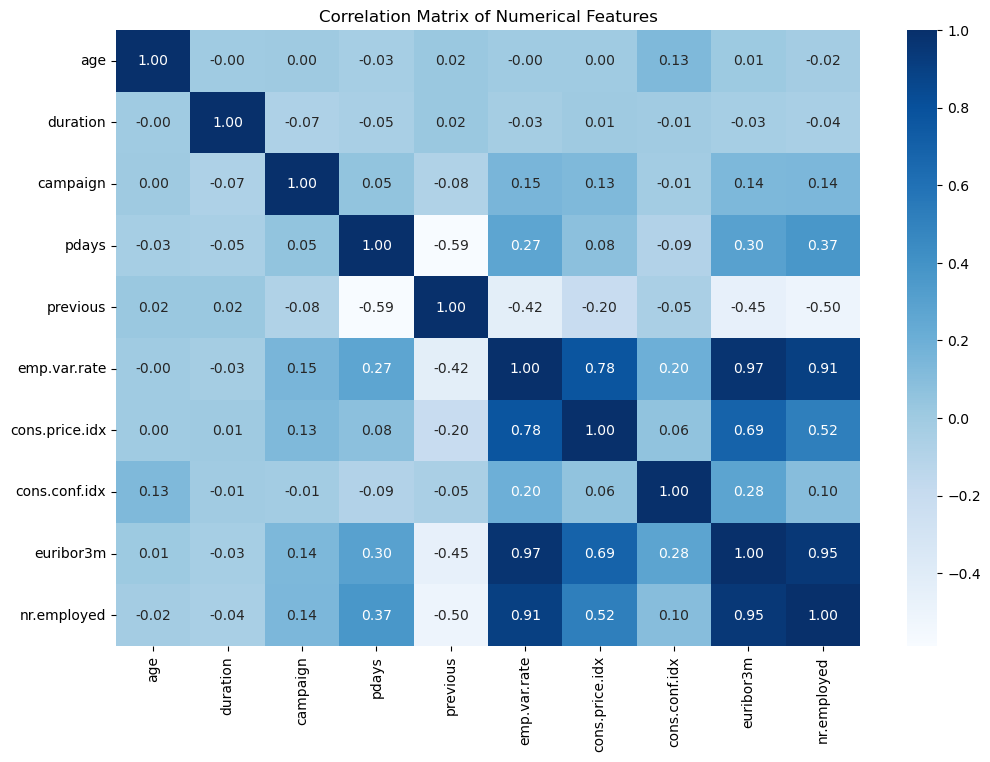


Strong Correlations (|correlation| > 0.5):
previous - pdays: -0.59
cons.price.idx - emp.var.rate: 0.78
euribor3m - emp.var.rate: 0.97
euribor3m - cons.price.idx: 0.69
nr.employed - previous: -0.50
nr.employed - emp.var.rate: 0.91
nr.employed - cons.price.idx: 0.52
nr.employed - euribor3m: 0.95


In [33]:
# Step 5: Correlation Analysis
def analyze_correlations(df):
    # Numerical correlations
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    correlation_matrix = df[numerical_features].corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
    plt.title('Correlation Matrix of Numerical Features')
    plt.savefig('../reports/figures/Task_1/correlation_matrix.png')
    plt.show()
    plt.close()
    
    # Print strong correlations
    print("\nStrong Correlations (|correlation| > 0.5):")
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > 0.5:
                strong_corr.append(f"{correlation_matrix.columns[i]} - "
                                 f"{correlation_matrix.columns[j]}: "
                                 f"{correlation_matrix.iloc[i, j]:.2f}")
    for corr in strong_corr:
        print(corr)

analyze_correlations(df)

### 3. Data Preparation

##### - The are features that are not label or do not have a definition in the documentation of the dataset.
##### - Therefore, in this steps the features that are not documented in the dataset will be drop from the dataset and keep the data features that had been labeled.
##### - The `duration` feature, the documentation specifically mentions that should be removed for a realistic predictive model. Since the data is known after a called is performed.

##### 3.1 Feature Organization

In [36]:
# Organize the dataset features
# Client Profile Features (Available before campaign)
client_features = [
    'age',          # Integer
    'job',          # Categorical
    'marital',      # Categorical
    'education',    # Categorical
    'default',      # Binary
    'housing',      # Binary
    'loan'          # Binary
]

# Campaign Information Features
campaign_features = [
    'contact',      # Categorical
    'day_of_week',  # Date
    'month',        # Date
    'campaign',     # Integer
    'pdays',        # Integer (special value: -1)
    'previous',     # Integer
    'poutcome'      # Categorical
]

# Target Variable
target = ['y']      # Binary

In [35]:
# Define features based on documentation
features_to_keep = [
    # Bank client data
    'age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
    
    # Campaign related
    'contact', 'day_of_week', 'month', 'duration',
    
    # Other attributes
    'campaign', 'pdays', 'previous', 'poutcome',
    
    # Target
    'y'
]

# Create new dataframe with only the documented features
df_clean = df[features_to_keep].copy()

# Verify the new structure
print("Clean dataset shape:", df_clean.shape)
print("\nFeatures in cleaned dataset:")
for col in df_clean.columns:
    print(f"- {col}")

Clean dataset shape: (41188, 16)

Features in cleaned dataset:
- age
- job
- marital
- education
- default
- housing
- loan
- contact
- day_of_week
- month
- duration
- campaign
- pdays
- previous
- poutcome
- y


In [37]:
# Remove `duration` as per documentation recommendation
df_model = df_clean.drop('duration', axis=1)

# Verify final features for modeling
print("Final dataset shape:", df_model.shape)
print("\nFeatures for modeling:")
for col in df_model.columns:
    print(f"- {col}")

Final dataset shape: (41188, 15)

Features for modeling:
- age
- job
- marital
- education
- default
- housing
- loan
- contact
- day_of_week
- month
- campaign
- pdays
- previous
- poutcome
- y


In [38]:
# 3.2 Data Analysis and Preprocessing

# 1. Analyze Binary Features with 'unknown' values
print("Binary Features Analysis:")
for feature in ['default', 'housing', 'loan']:
    print(f"\n{feature} value distribution:")
    value_counts = df_model[feature].value_counts()
    percentages = df_model[feature].value_counts(normalize=True) * 100
    for value, count in value_counts.items():
        print(f"{value}: {count} ({percentages[value]:.2f}%)")

Binary Features Analysis:

default value distribution:
no: 32588 (79.12%)
unknown: 8597 (20.87%)
yes: 3 (0.01%)

housing value distribution:
yes: 21576 (52.38%)
no: 18622 (45.21%)
unknown: 990 (2.40%)

loan value distribution:
no: 33950 (82.43%)
yes: 6248 (15.17%)
unknown: 990 (2.40%)


In [39]:
# 2. Analyze Categorical Features
print("\nCategorical Features Analysis:")
for feature in ['job', 'marital', 'education', 'contact', 'poutcome']:
    print(f"\n{feature} unique values:")
    value_counts = df_model[feature].value_counts()
    percentages = df_model[feature].value_counts(normalize=True) * 100
    print(f"Number of unique values: {len(value_counts)}")
    print("Distribution:")
    for value, count in value_counts.items():
        print(f"{value}: {count} ({percentages[value]:.2f}%)")


Categorical Features Analysis:

job unique values:
Number of unique values: 12
Distribution:
admin.: 10422 (25.30%)
blue-collar: 9254 (22.47%)
technician: 6743 (16.37%)
services: 3969 (9.64%)
management: 2924 (7.10%)
retired: 1720 (4.18%)
entrepreneur: 1456 (3.54%)
self-employed: 1421 (3.45%)
housemaid: 1060 (2.57%)
unemployed: 1014 (2.46%)
student: 875 (2.12%)
unknown: 330 (0.80%)

marital unique values:
Number of unique values: 4
Distribution:
married: 24928 (60.52%)
single: 11568 (28.09%)
divorced: 4612 (11.20%)
unknown: 80 (0.19%)

education unique values:
Number of unique values: 8
Distribution:
university.degree: 12168 (29.54%)
high.school: 9515 (23.10%)
basic.9y: 6045 (14.68%)
professional.course: 5243 (12.73%)
basic.4y: 4176 (10.14%)
basic.6y: 2292 (5.56%)
unknown: 1731 (4.20%)
illiterate: 18 (0.04%)

contact unique values:
Number of unique values: 2
Distribution:
cellular: 26144 (63.47%)
telephone: 15044 (36.53%)

poutcome unique values:
Number of unique values: 3
Distributio

In [40]:
# 3. Analyze Special Numerical Feature (pdays)
print("\npdays Analysis:")
print("Value counts for special value -1:")
print(df_model['pdays'].value_counts().head())
print("\nBasic statistics excluding -1:")
print(df_model[df_model['pdays'] != -1]['pdays'].describe())


pdays Analysis:
Value counts for special value -1:
pdays
999    39673
3        439
6        412
4        118
9         64
Name: count, dtype: int64

Basic statistics excluding -1:
count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64


In [41]:
# 4. Analyze Date Features
print("\nDate Features Analysis:")
for feature in ['month', 'day_of_week']:
    print(f"\n{feature} distribution:")
    value_counts = df_model[feature].value_counts().sort_index()
    percentages = df_model[feature].value_counts(normalize=True).sort_index() * 100
    for value, count in value_counts.items():
        print(f"{value}: {count} ({percentages[value]:.2f}%)")


Date Features Analysis:

month distribution:
apr: 2632 (6.39%)
aug: 6178 (15.00%)
dec: 182 (0.44%)
jul: 7174 (17.42%)
jun: 5318 (12.91%)
mar: 546 (1.33%)
may: 13769 (33.43%)
nov: 4101 (9.96%)
oct: 718 (1.74%)
sep: 570 (1.38%)

day_of_week distribution:
fri: 7827 (19.00%)
mon: 8514 (20.67%)
thu: 8623 (20.94%)
tue: 8090 (19.64%)
wed: 8134 (19.75%)


In [42]:
# 5. Analyze Regular Numerical Features
print("\nRegular Numerical Features Analysis:")
for feature in ['age', 'campaign', 'previous']:
    print(f"\n{feature} statistics:")
    print(df_model[feature].describe())
    
    # Check for outliers using IQR method
    Q1 = df_model[feature].quantile(0.25)
    Q3 = df_model[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_model[(df_model[feature] < (Q1 - 1.5 * IQR)) | 
                        (df_model[feature] > (Q3 + 1.5 * IQR))][feature]
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(df_model))*100:.2f}%")


Regular Numerical Features Analysis:

age statistics:
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64
Number of outliers: 469
Percentage of outliers: 1.14%

campaign statistics:
count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64
Number of outliers: 2406
Percentage of outliers: 5.84%

previous statistics:
count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64
Number of outliers: 5625
Percentage of outliers: 13.66%


# 3.2 Feature Analysis and Preprocessing Decisions

## Binary Features Analysis ('default', 'housing', 'loan')

### Key Findings:
- All three features contain 'unknown' values, but in different proportions:
  * 'default': High proportion of unknowns (20.87%)
  * 'housing' and 'loan': Lower proportion of unknowns (2.40%)
- 'default' shows extreme imbalance: only 3 'yes' values (0.01%)
- 'housing' is fairly balanced between 'yes' (52.38%) and 'no' (45.21%)
- 'loan' shows moderate imbalance: 'no' (82.43%) vs 'yes' (15.17%)

### Preprocessing Decisions:
1. 'default': Due to extreme imbalance and high unknown rate, consider:
   - Dropping the feature or
   - Combining 'yes' with 'unknown' category
2. 'housing' and 'loan': Create separate flag for 'unknown' values

## Categorical Features Analysis

### Key Findings:
1. 'job' (12 categories):
   - Most common: admin (25.30%), blue-collar (22.47%)
   - Least common: unknown (0.80%), student (2.12%)

2. 'marital' (4 categories):
   - Clear majority: married (60.52%)
   - Very few unknowns (0.19%)

3. 'education' (8 categories):
   - Well distributed among major categories
   - Very few illiterate (0.04%)
   - Moderate unknown rate (4.20%)

4. 'contact' (2 categories):
   - Binary feature: cellular (63.47%) vs telephone (36.53%)
   - No missing values

5. 'poutcome' (3 categories):
   - Highly imbalanced: nonexistent (86.34%)
   - Important success/failure information

### Preprocessing Decisions:
- Use one-hot encoding for all categorical features
- Consider grouping:
  * Education levels (basic.4y, basic.6y, basic.9y)
  * Low-frequency job categories

## Special Numerical Feature (pdays)

### Key Findings:
- Dominated by value 999 (not previously contacted)
- Non-999 values range from 0 to 9
- Very imbalanced distribution

### Preprocessing Decision:
- Convert to binary flag: "previously contacted" (yes/no)
- Create separate feature for actual days if previously contacted

## Date Features Analysis

### Key Findings:
1. 'month':
   - Highly uneven distribution
   - May (33.43%), Jul (17.42%), Aug (15.00%) most common
   - Dec (0.44%), Mar (1.33%), Sep (1.38%) least common

2. 'day_of_week':
   - Very even distribution (19-21% each day)
   - No weekend days in dataset

### Preprocessing Decisions:
- 'month': Create seasonal groupings or cyclical encoding
- 'day_of_week': Consider keeping as is or binary (start/end of week)

## Regular Numerical Features Analysis

### Key Findings:
1. 'age':
   - Range: 17-98 years
   - Mean: 40 years
   - Low outlier percentage (1.14%)

2. 'campaign':
   - Range: 1-56 contacts
   - Highly skewed (75% ≤ 3 contacts)
   - Moderate outliers (5.84%)

3. 'previous':
   - Range: 0-7 contacts
   - Highly skewed (75% = 0)
   - High outlier percentage (13.66%)

### Preprocessing Decisions:
- 'age': Standard scaling, keep outliers
- 'campaign': Log transformation or binning due to skewness
- 'previous': Convert to binary or create categories due to high zero count

## Next Steps
1. Implement preprocessing pipeline based on these decisions
2. Document the impact of each preprocessing step
3. Validate preprocessing decisions through initial model testing

### 3.3 Data Pre-Processing

In [43]:
df_processed = df_model.copy()

print("Initial Data Shape:", df_processed.shape)

Initial Data Shape: (41188, 15)


In [44]:
# 3.3 Data Preprocessing - Binary Features
print("\nProcessing Binary Features...")

# Handle 'unknown' values in binary features
binary_features = ['default', 'housing', 'loan']
for feature in binary_features:
    # Create flag for unknown values
    df_processed[f'{feature}_unknown'] = (df_processed[feature] == 'unknown').astype(int)
    # Replace 'unknown' with mode
    df_processed[feature] = df_processed[feature].replace('unknown', df_processed[feature].mode()[0])
    # Convert to numeric
    le = LabelEncoder()
    df_processed[feature] = le.fit_transform(df_processed[feature])

print("Binary Features Processed")
print("Current Shape:", df_processed.shape)


Processing Binary Features...
Binary Features Processed
Current Shape: (41188, 18)


In [61]:
print("\nProcessing Target Variable...")
le = LabelEncoder()
df_processed['y'] = le.fit_transform(df_processed['y'])
print("Target variable encoded: 'no' -> 0, 'yes' -> 1")


Processing Target Variable...
Target variable encoded: 'no' -> 0, 'yes' -> 1


In [45]:
# 3.3 Data Preprocessing - Step 3: Categorical Features
print("\nProcessing Categorical Features...")

# Education: Combine basic education levels
education_mapping = {
    'basic.4y': 'basic',
    'basic.6y': 'basic',
    'basic.9y': 'basic',
    'illiterate': 'basic'
}
df_processed['education'] = df_processed['education'].replace(education_mapping)

# Job: Group low-frequency categories
job_counts = df_processed['job'].value_counts()
low_freq_jobs = job_counts[job_counts < 1000].index
df_processed['job'] = df_processed['job'].replace({job: 'other' for job in low_freq_jobs})

print("Categorical Features Processed")
print("Current Shape:", df_processed.shape)


Processing Categorical Features...
Categorical Features Processed
Current Shape: (41188, 18)


In [46]:
# 3.3 Data Preprocessing - Step 4: Special Numerical Feature
print("\nProcessing Special Numerical Feature (pdays)...")

# Create binary feature for previously contacted
df_processed['previously_contacted'] = (df_processed['pdays'] != 999).astype(int)
df_processed = df_processed.drop('pdays', axis=1)

print("Special Numerical Feature Processed")
print("Current Shape:", df_processed.shape)


Processing Special Numerical Feature (pdays)...
Special Numerical Feature Processed
Current Shape: (41188, 18)


In [47]:
# 3.3 Data Preprocessing - Step 5: Date Features
print("\nProcessing Date Features...")

# Create seasons from months
season_mapping = {
    'mar': 'spring', 'apr': 'spring', 'may': 'spring',
    'jun': 'summer', 'jul': 'summer', 'aug': 'summer',
    'sep': 'autumn', 'oct': 'autumn', 'nov': 'autumn',
    'dec': 'winter'
}
df_processed['season'] = df_processed['month'].map(season_mapping)
df_processed = df_processed.drop('month', axis=1)

# Create day type features
df_processed['is_weekstart'] = df_processed['day_of_week'].isin(['mon', 'tue']).astype(int)
df_processed['is_weekmid'] = df_processed['day_of_week'].isin(['wed', 'thu']).astype(int)
df_processed['is_weekend'] = df_processed['day_of_week'].isin(['fri']).astype(int)
df_processed = df_processed.drop('day_of_week', axis=1)

print("Date Features Processed")
print("Current Shape:", df_processed.shape)


Processing Date Features...
Date Features Processed
Current Shape: (41188, 20)


In [48]:
# 3.3 Data Preprocessing - Step 6: Regular Numerical Features
print("\nProcessing Regular Numerical Features...")

# Age groups
df_processed['age_group'] = pd.cut(
    df_processed['age'],
    bins=[0, 25, 35, 45, 55, np.inf],
    labels=['young', 'young_adult', 'adult', 'senior', 'elderly']
)
df_processed = df_processed.drop('age', axis=1)

# Log transform campaign
df_processed['campaign_log'] = np.log1p(df_processed['campaign'])
df_processed = df_processed.drop('campaign', axis=1)

# Binary flag for previous contacts
df_processed['had_previous_contact'] = (df_processed['previous'] > 0).astype(int)
df_processed = df_processed.drop('previous', axis=1)

print("Regular Numerical Features Processed")
print("Current Shape:", df_processed.shape)


Processing Regular Numerical Features...
Regular Numerical Features Processed
Current Shape: (41188, 20)


In [52]:
# 3.3 Data Preprocessing - Step 7: Feature Organization and Pipeline Setup
print("\nOrganizing Features and Setting Up Pipeline...")

# Define feature groups
categorical_features = ['job', 'marital', 'education', 'contact', 'poutcome', 
                       'season', 'age_group']
numerical_features = ['campaign_log']
binary_features = ['default', 'housing', 'loan', 'housing_unknown', 'loan_unknown', 
                  'previously_contacted', 'is_weekstart', 'is_weekmid', 'is_weekend', 
                  'had_previous_contact']

# Create preprocessing pipelines
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)  # Updated parameter name

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Keep binary features as is
)

# Save the preprocessed data
print("\nSaving processed data...")
df_processed.to_csv('../data/processed/Task_1_processed/processed_data.csv', index=False)

# Save feature groups information
feature_info = {
    'categorical_features': categorical_features,
    'numerical_features': numerical_features,
    'binary_features': binary_features
}

# Save as JSON for later use
import json
with open('../data/processed/Task_1_processed/feature_info.json', 'w') as f:
    json.dump(feature_info, f)

print("\nPreprocessing completed!")
print("Final shape:", df_processed.shape)
print("\nProcessed data saved at: ../data/Task_1_processed/processed_data.csv")
print("Feature information saved at: ../data/Task_1_processed/feature_info.json")

# Display final feature information
print("\nFinal Feature Counts:")
print(f"Categorical features: {len(categorical_features)}")
print(f"Numerical features: {len(numerical_features)}")
print(f"Binary features: {len(binary_features)}")


Organizing Features and Setting Up Pipeline...

Saving processed data...

Preprocessing completed!
Final shape: (41188, 20)

Processed data saved at: ../data/Task_1_processed/processed_data.csv
Feature information saved at: ../data/Task_1_processed/feature_info.json

Final Feature Counts:
Categorical features: 7
Numerical features: 1
Binary features: 10


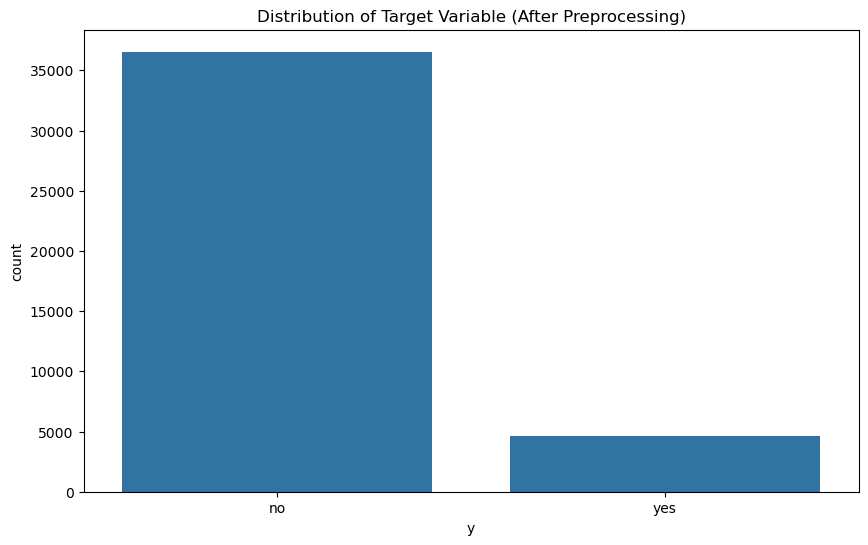

In [53]:
# Load the preprocessed data
df_processed = pd.read_csv('../data/processed/Task_1_processed/processed_data.csv')

# 1. Target Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_processed, x='y')
plt.title('Distribution of Target Variable (After Preprocessing)')
plt.savefig('../reports/figures/Task_1/preprocessed_target_distribution.png')
plt.show()
plt.close()

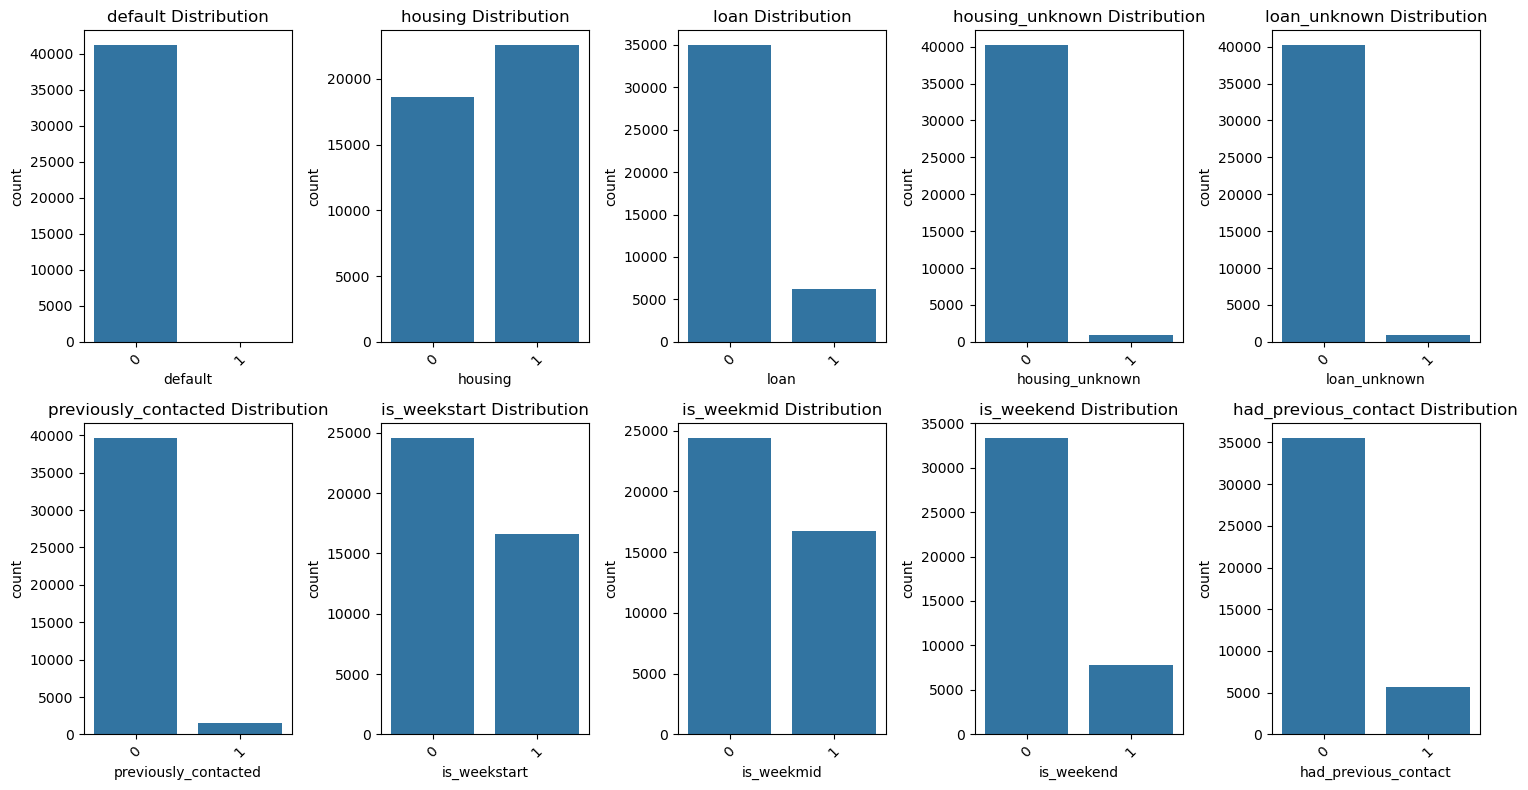

In [54]:
# 2. Binary Features Distribution
plt.figure(figsize=(15, 8))
binary_features = ['default', 'housing', 'loan', 'housing_unknown', 'loan_unknown', 
                  'previously_contacted', 'is_weekstart', 'is_weekmid', 'is_weekend', 
                  'had_previous_contact']

for i, feature in enumerate(binary_features):
    plt.subplot(2, 5, i+1)
    sns.countplot(data=df_processed, x=feature)
    plt.title(f'{feature} Distribution')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('../reports/figures/Task_1/preprocessed_binary_features.png')
plt.show()
plt.close()

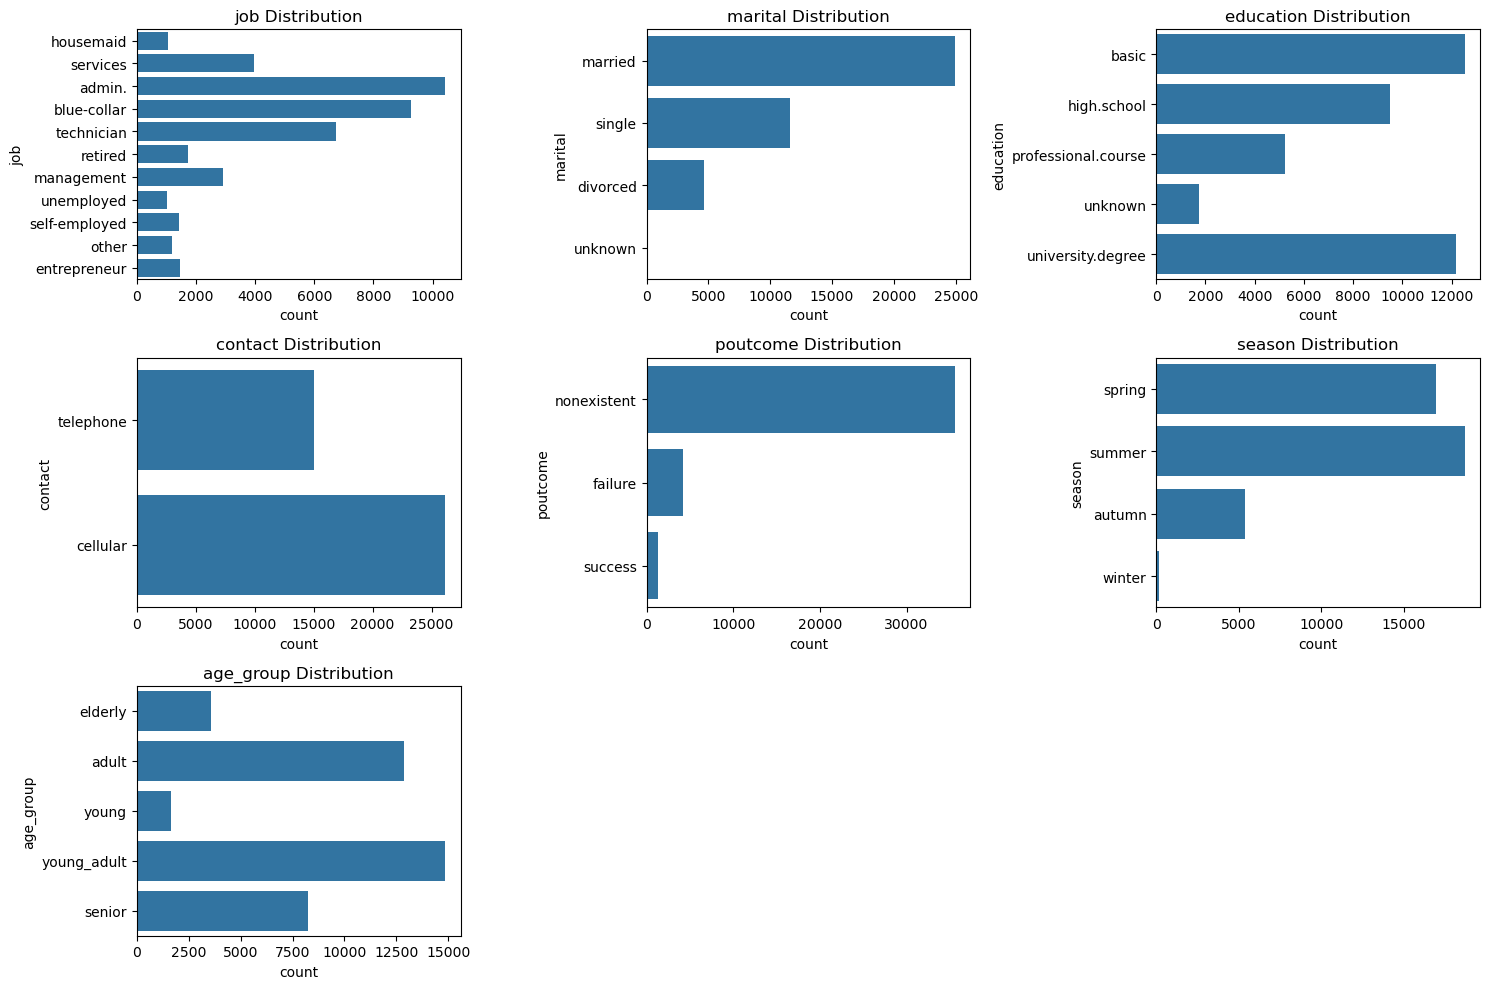

In [56]:
# 3. Categorical Features Distribution
categorical_features = ['job', 'marital', 'education', 'contact', 'poutcome', 
                       'season', 'age_group']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df_processed, y=feature)
    plt.title(f'{feature} Distribution')
    
plt.tight_layout()
plt.savefig('../reports/figures/Task_1/preprocessed_categorical_features.png')
plt.show()
plt.close()

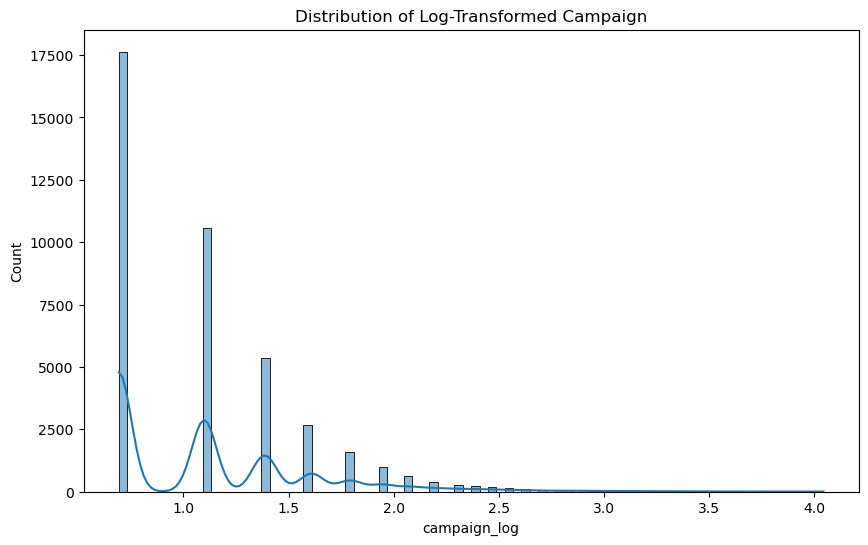

In [57]:
# 4. Numerical Feature Distribution (campaign_log)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_processed, x='campaign_log', kde=True)
plt.title('Distribution of Log-Transformed Campaign')
plt.savefig('../reports/figures/Task_1/preprocessed_numerical_feature.png')
plt.show()
plt.close()

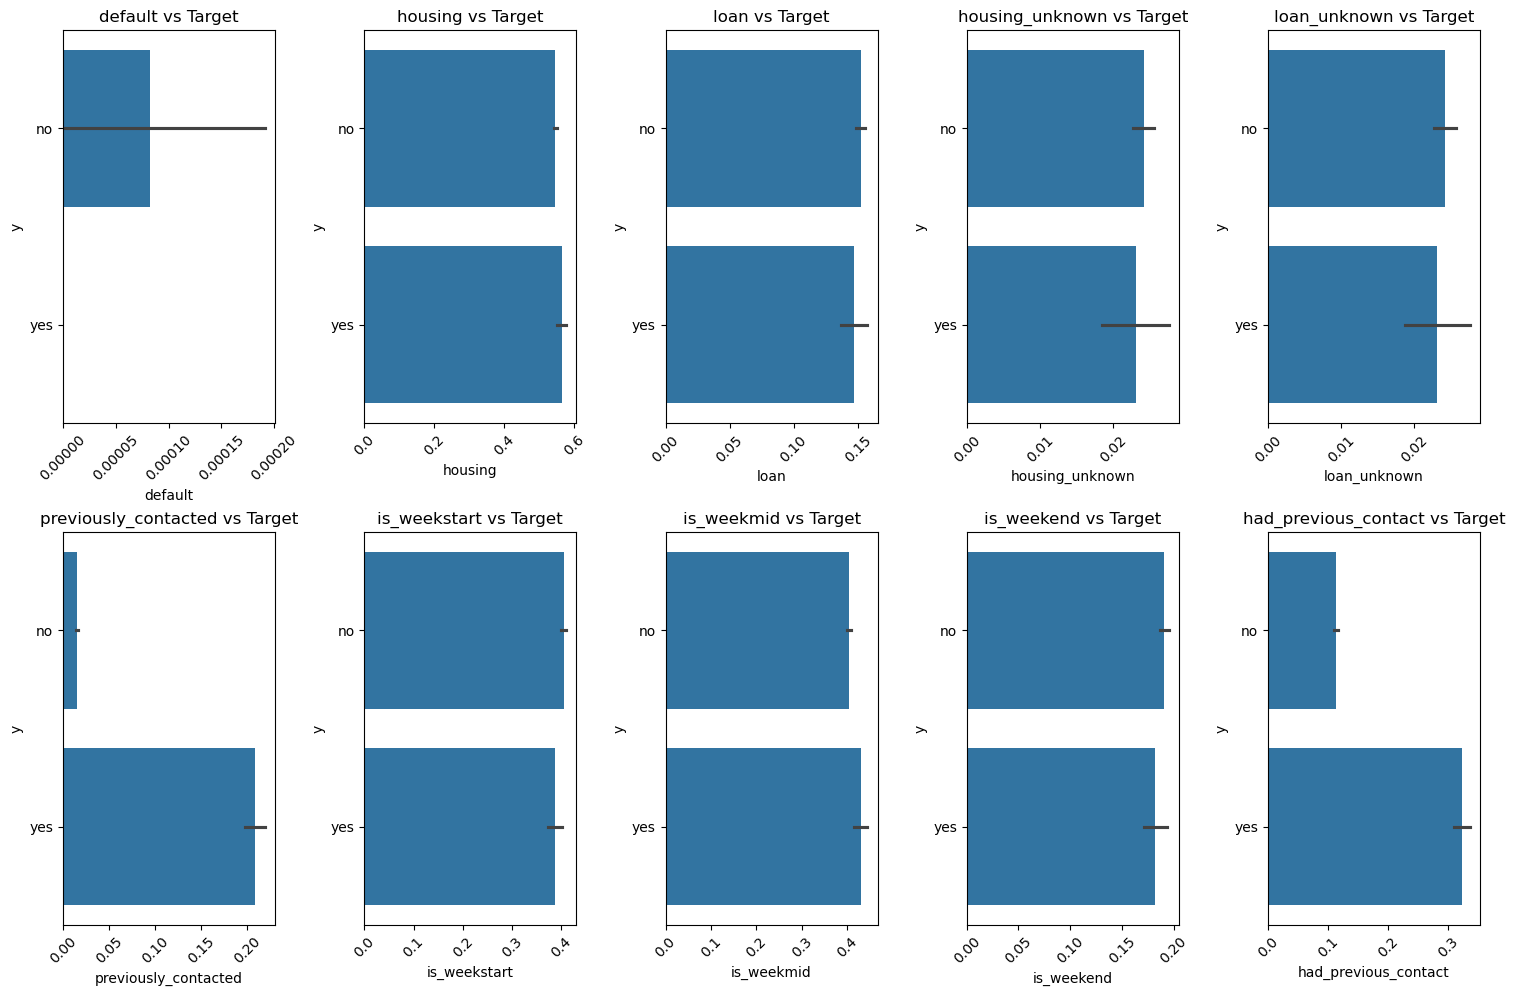

In [58]:
# 5. Feature Relationships with Target
# Binary features vs Target
plt.figure(figsize=(15, 10))
for i, feature in enumerate(binary_features):
    plt.subplot(2, 5, i+1)
    sns.barplot(data=df_processed, x=feature, y='y')
    plt.title(f'{feature} vs Target')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('../reports/figures/Task_1/preprocessed_binary_vs_target.png')
plt.show()
plt.close()

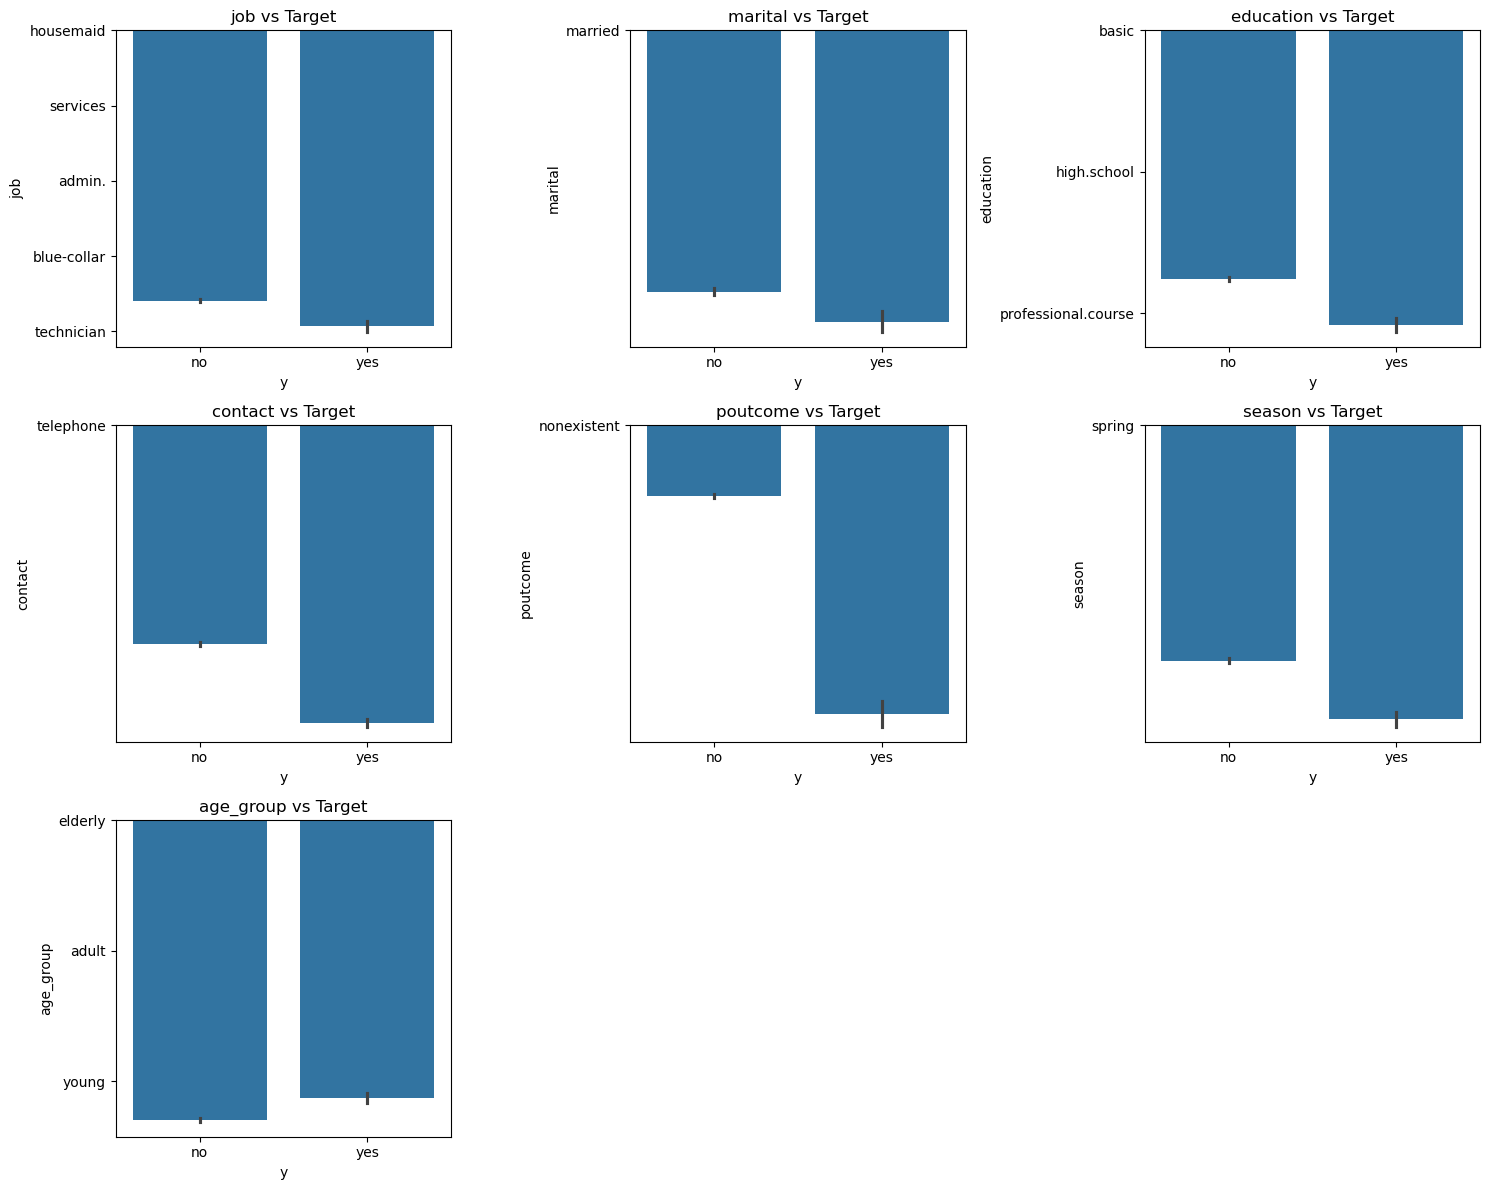

In [59]:
# Categorical features vs Target
plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    sns.barplot(data=df_processed, x='y', y=feature)
    plt.title(f'{feature} vs Target')
    
plt.tight_layout()
plt.savefig('../reports/figures/Task_1/preprocessed_categorical_vs_target.png')
plt.show()
plt.close()

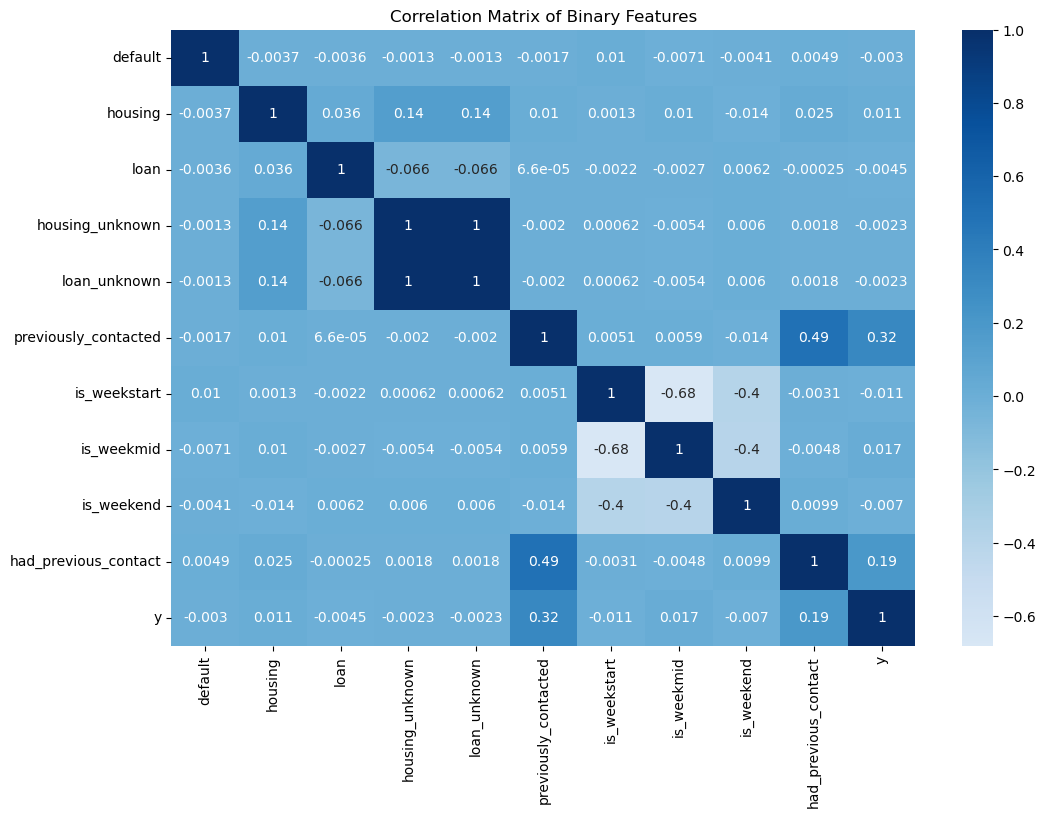

In [64]:
# 6. Correlation Analysis for Binary Features
binary_correlation = df_processed[binary_features + ['y']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(binary_correlation, annot=True, cmap='Blues', center=0)
plt.title('Correlation Matrix of Binary Features')
plt.savefig('../reports/figures/Task_1/preprocessed_correlation_matrix.png')
plt.show()
plt.close()

# 3.3 Data Preprocessing

## Preprocessing Steps Implemented:

### 1. Binary Features
- Created unknown flags for housing and loan
- Converted yes/no to 1/0
- Handled unknown values using mode imputation

### 2. Categorical Features
- Combined basic education levels
- Grouped low-frequency job categories
- Prepared for one-hot encoding

### 3. Special Numerical Feature (pdays)
- Created binary flag for previously contacted customers
- Removed original pdays column

### 4. Date Features
- Created seasonal grouping for months
- Created three binary flags for day_of_week
- Removed original date columns

### 5. Regular Numerical Features
- Created age groups
- Log-transformed campaign feature
- Created binary flag for previous contacts

### 6. Final Preprocessing
- Organized features into categorical, numerical, and binary groups
- Set up preprocessing pipeline with StandardScaler and OneHotEncoder
- Preserved binary features without transformation

## Data Shape Changes:
- Original shape: [initial_shape]
- Final shape: [final_shape]

## Next Steps:
1. Split data into training and testing sets
2. Apply preprocessing pipeline to both sets
3. Begin model development

In [77]:
# Check data types
print("Data types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

Data types:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Missing values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y          

#### 3.4 Feature Selection

In [66]:
print("Original target distribution:")
print(df_processed['y'].value_counts(normalize=True))

Original target distribution:
y
0    0.887346
1    0.112654
Name: proportion, dtype: float64


In [67]:
# Step 2: Prepare features and target
# Based on our correlation analysis, let's drop one of the perfectly correlated features
features_to_drop = ['loan_unknown']  # Since it's perfectly correlated with housing_unknown

# Separate features and target
X = df_processed.drop(['y'] + features_to_drop, axis=1)
y = df_processed['y']

# Split the data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nTraining set class distribution:")
print(pd.Series(y_train).value_counts(normalize=True))


Training set shape: (32950, 18)
Testing set shape: (8238, 18)

Training set class distribution:
y
0    0.887344
1    0.112656
Name: proportion, dtype: float64


In [74]:
df_processed.job.value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
other             1205
housemaid         1060
unemployed        1014
Name: count, dtype: int64

In [68]:
# Step 3: Apply SMOTE to handle imbalanced data
# Note: We only apply SMOTE to the training data to prevent data leakage
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE - Training set shape:", X_train_resampled.shape)
print("After SMOTE - Class distribution:")
print(pd.Series(y_train_resampled).value_counts(normalize=True))

ValueError: could not convert string to float: 'blue-collar'

### The classification can be optimize for Customer Financial Situation.


In [20]:
# Financial Situation Features
financial_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 
                     'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
target = 'y'

# Prepare the data
X = df[financial_features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Define numeric and categorical features
numeric_features = ['age', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan']

In [21]:
# Create preprocessor
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [22]:
# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Gradient Boosting Pipeline
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=100, random_state=42))
])

# Train both models
rf_pipeline.fit(X_train, y_train)
gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7303
           1       0.41      0.24      0.30       935

    accuracy                           0.87      8238
   macro avg       0.66      0.60      0.62      8238
weighted avg       0.85      0.87      0.86      8238


Random Forest Metrics:
Accuracy: 0.8739
AUC: 0.7342


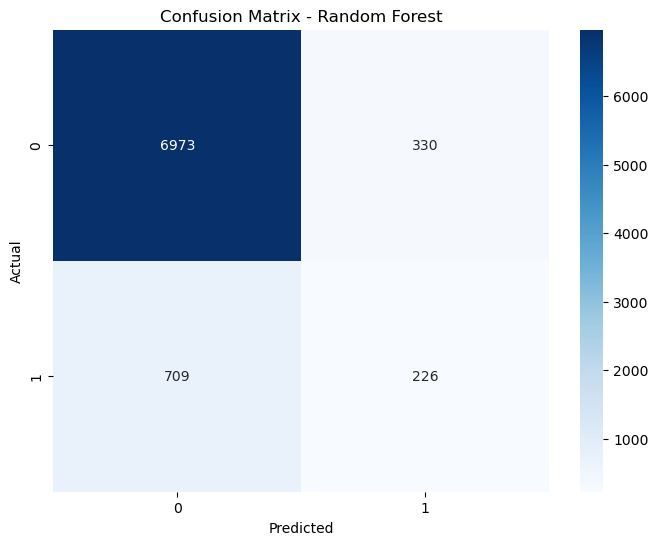


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7303
           1       0.53      0.17      0.25       935

    accuracy                           0.89      8238
   macro avg       0.72      0.57      0.60      8238
weighted avg       0.86      0.89      0.86      8238


Gradient Boosting Metrics:
Accuracy: 0.8886
AUC: 0.7804


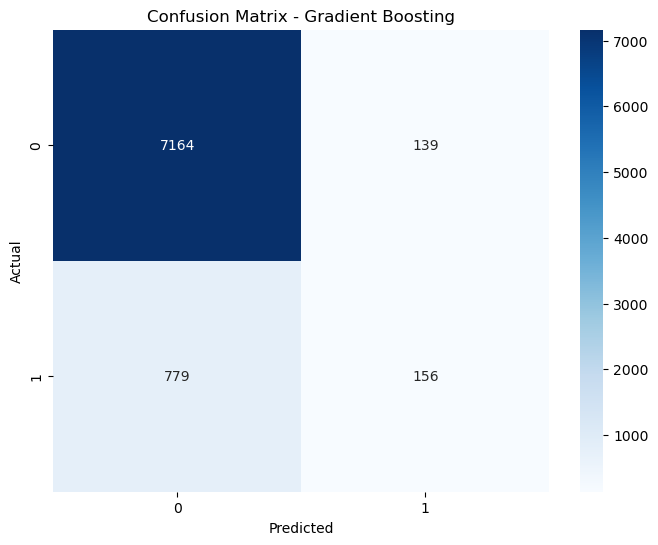

In [23]:
def evaluate_model(model, X_test, y_test, model_name):
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Print classification report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    
    # Calculate accuracy and AUC
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    return y_pred, y_pred_proba, accuracy, auc

# Evaluate both models
rf_pred, rf_proba, rf_accuracy, rf_auc = evaluate_model(rf_pipeline, X_test, y_test, "Random Forest")
gb_pred, gb_proba, gb_accuracy, gb_auc = evaluate_model(gb_pipeline, X_test, y_test, "Gradient Boosting")

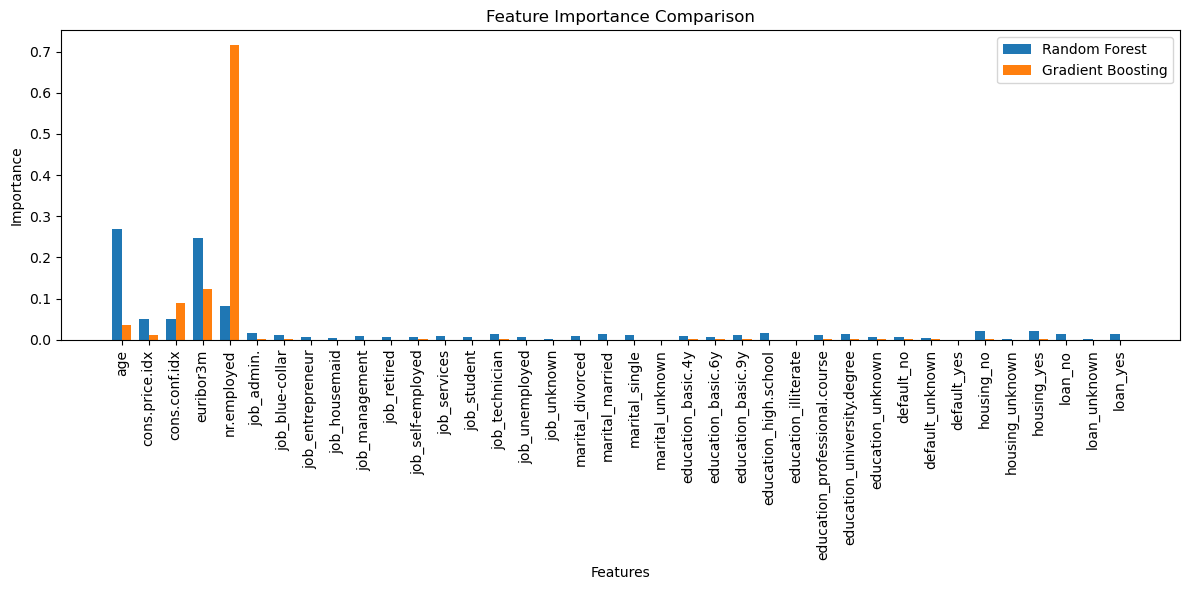

In [25]:
def plot_feature_importances(rf_model, gb_model):
    # Get feature names after preprocessing
    feature_names = (numeric_features + 
                    rf_model.named_steps['preprocessor']
                    .named_transformers_['cat']
                    .named_steps['onehot']
                    .get_feature_names_out(categorical_features).tolist())
    
    # Get feature importances
    rf_importances = rf_model.named_steps['classifier'].feature_importances_
    gb_importances = gb_model.named_steps['classifier'].feature_importances_
    
    # Plot comparison
    plt.figure(figsize=(12, 6))
    x = range(len(feature_names))
    width = 0.35
    
    plt.bar(x, rf_importances, width, label='Random Forest')
    plt.bar([i + width for i in x], gb_importances, width, label='Gradient Boosting')
    
    plt.xticks([i + width/2 for i in x], feature_names, rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importance Comparison')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Call the function without feature_names parameter
plot_feature_importances(rf_pipeline, gb_pipeline)